# Other Analysis
First, we compare the number of line breaks, which is significantly lower than ChatGPT (see Fig: : Number of new lines per essays). Then we compare the length of the essays, which is about the same except for the peak around the tenth student essay (see Fig: Essay length). The number of new lines per character shows the same discrepancy between ChatGPT and the students as the number of new lines overall (see Fig: Rate of new lines per character).

Then, we compare the 100 most frequent words of the essays after removing stop words and some extra characters and de-stemming them. Then we compare the number of remaining words when we extract the most frequent words of students from the most frequent words of ChatGPT (see Fig.: Number of non stop words without words from the student essay). Here we can see a difference between ChatGPT with 0.2 temperature and 0.9 temperature. When we remove the most frequent ChatGPT words, we also observe a difference between the remaining ChatGPT and the student essay (see Fig: Number of non stop words without words from the ChatGPT 0.2 essay and Fig: Number of non stop words without words from the ChatGPT 0.9 essay). This shows that the essays generated with ChatGPT are similar, even though they were generated with different temperatures.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
import config

path = config.system_path

plt.rcParams["figure.figsize"] = (config.fig_x, config.fig_y)

def plot_smooth(x, y, label, color):
    X_Y_Spline = make_interp_spline(x, y)
    X_ = np.linspace(x.min(), x.max(), 500)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = label, color = color)


essays = pd.read_csv(path + "preprocessed_data.csv", sep=";", encoding="UTF-8")

# Counting the numer of newlines
essays["Newlines Student"] = essays["Student Essay"].apply(lambda x: x.count("\n"))
essays["Newlines ChatGPT Essay 0.2"] = essays["ChatGPT Essay 0.2"].apply(lambda x: x.count("\n"))
essays["Newlines ChatGPT Essay 0.9"] = essays["ChatGPT Essay 0.9"].apply(lambda x: x.count("\n"))


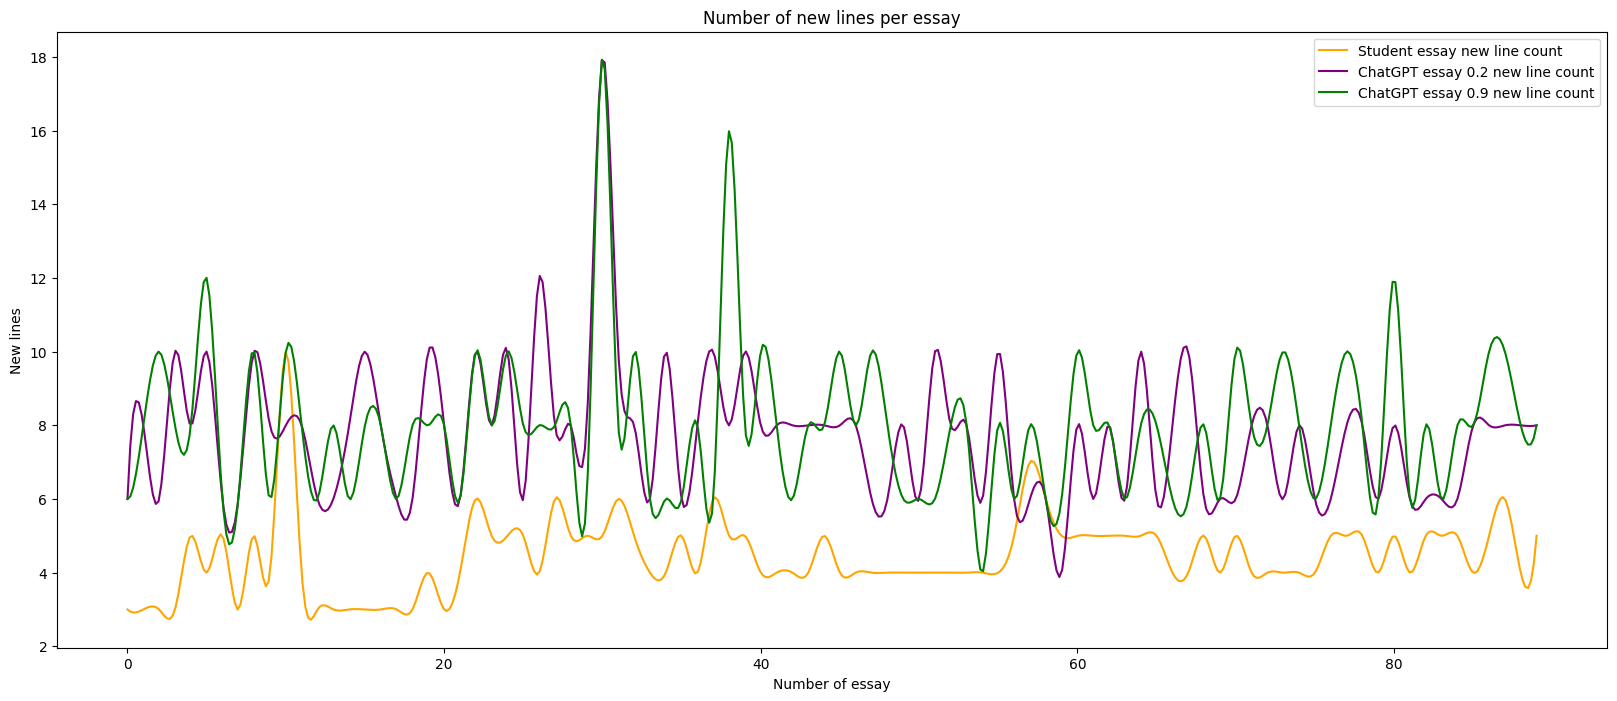

In [2]:
plot_smooth(essays["Unnamed: 0"], essays["Newlines Student"], "Student essay new line count", "orange")
plot_smooth(essays["Unnamed: 0"], essays["Newlines ChatGPT Essay 0.2"], "ChatGPT essay 0.2 new line count", "purple")
plot_smooth(essays["Unnamed: 0"], essays["Newlines ChatGPT Essay 0.9"], "ChatGPT essay 0.9 new line count", "green")
plt.xlabel("Number of essay")
plt.ylabel("New lines")
plt.title("Number of new lines per essay")
plt.legend()
plt.show()


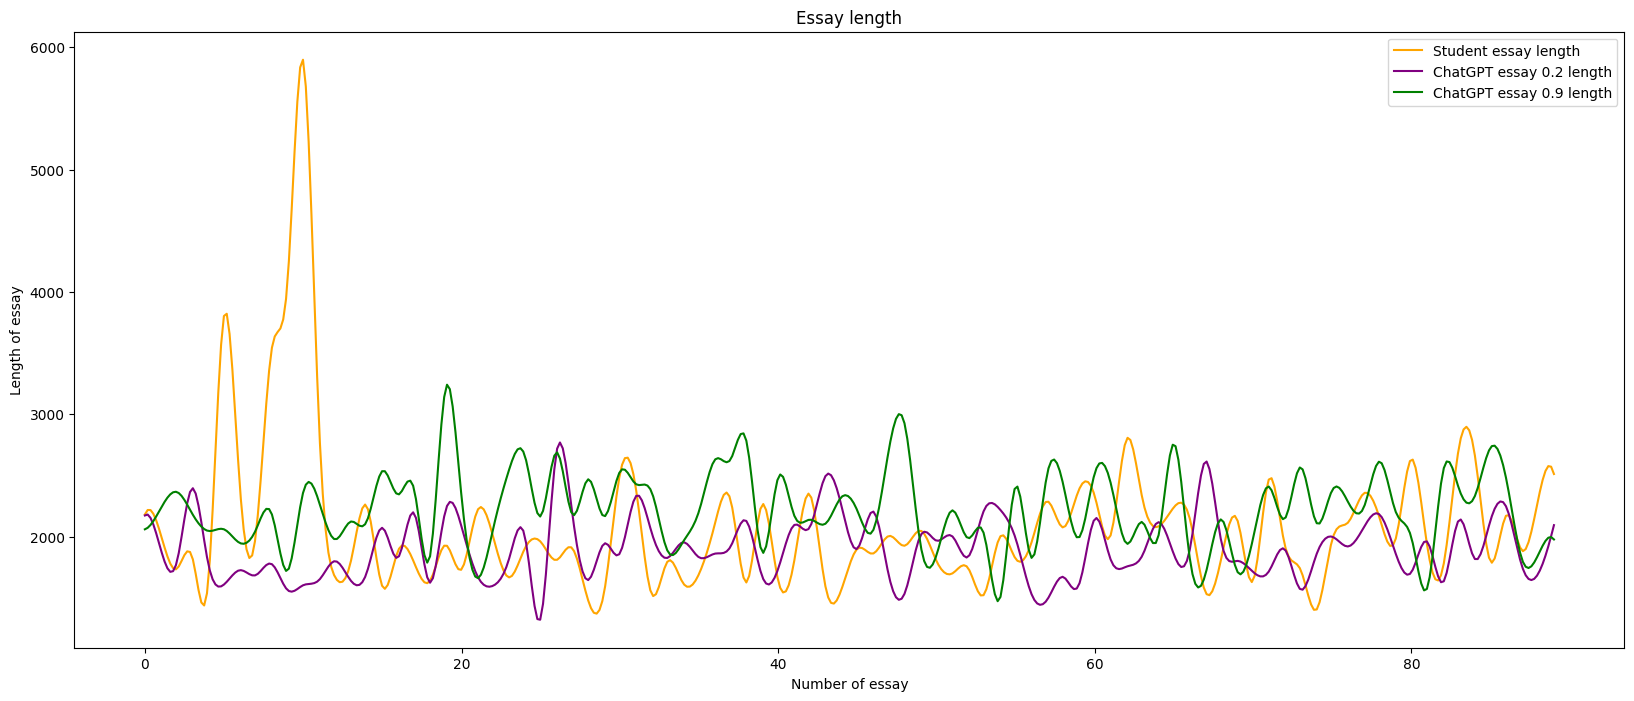

In [3]:
plot_smooth(essays["Unnamed: 0"], essays["Student Essay length"], "Student essay length", "orange")
plot_smooth(essays["Unnamed: 0"], essays["ChatGPT Essay 0.2 length"], "ChatGPT essay 0.2 length", "purple")
plot_smooth(essays["Unnamed: 0"], essays["ChatGPT Essay 0.9 length"], "ChatGPT essay 0.9 length", "green")
plt.xlabel("Number of essay")
plt.ylabel("Length of essay")
plt.title("Essay length")
plt.legend()
plt.show()

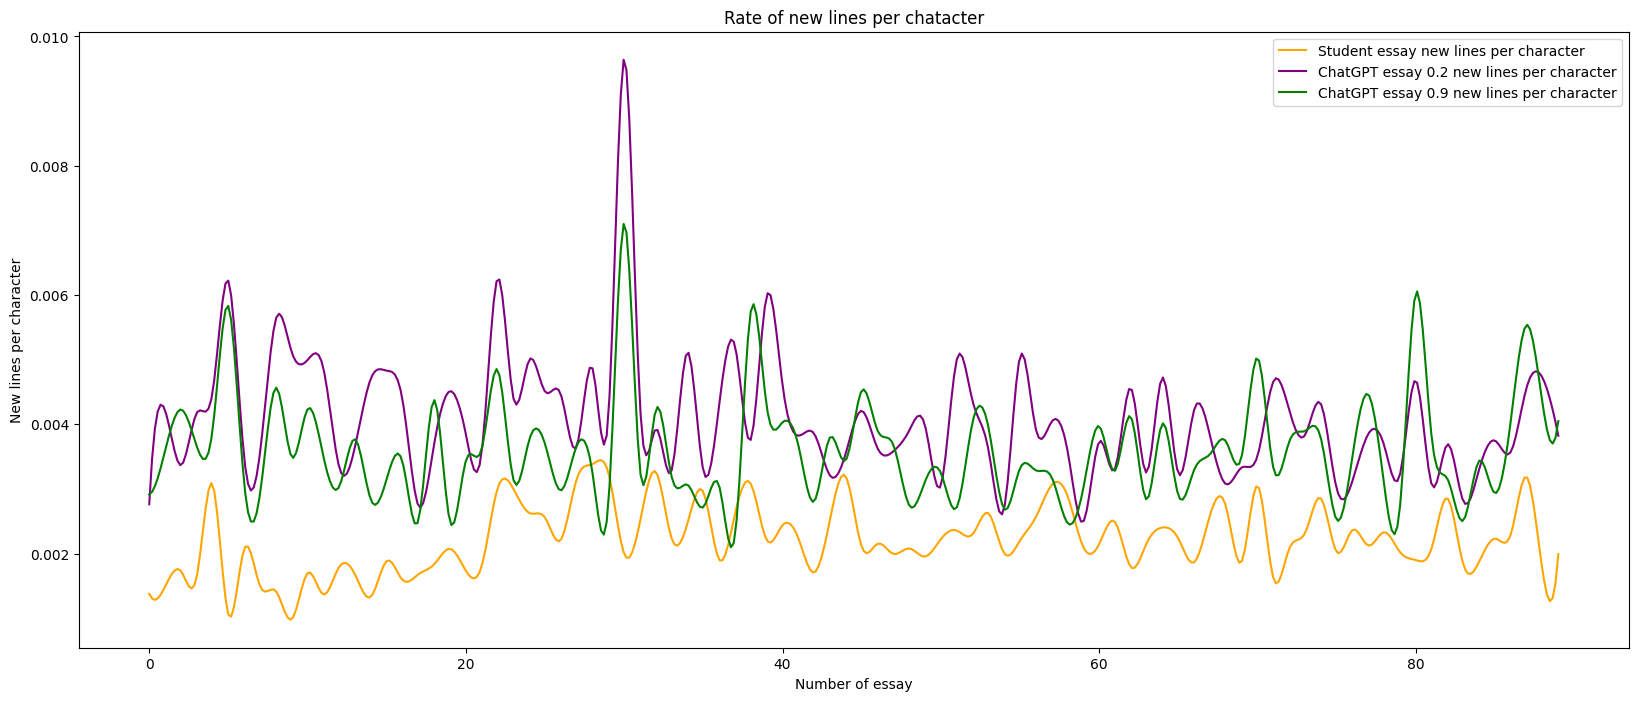

In [4]:
plot_smooth(essays["Unnamed: 0"],  essays["Newlines Student"] / essays["Student Essay length"], "Student essay new lines per character", "orange")
plot_smooth(essays["Unnamed: 0"], essays["Newlines ChatGPT Essay 0.2"] / essays["ChatGPT Essay 0.2 length"], "ChatGPT essay 0.2 new lines per character", "purple")
plot_smooth(essays["Unnamed: 0"], essays["Newlines ChatGPT Essay 0.9"] / essays["ChatGPT Essay 0.9 length"], "ChatGPT essay 0.9 new lines per character", "green")
plt.xlabel("Number of essay")
plt.ylabel("New lines per character")
plt.title("Rate of new lines per chatacter")
plt.legend()
plt.show()

In [5]:
from nltk.corpus import stopwords
import spacy
import re
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk

ps = PorterStemmer()
nlp = spacy.load('en_core_web_sm')
stop_words_nltk = set(stopwords.words('english'))

# Building regex with stopwords 
stop_regex = "\s("
for word in nlp.Defaults.stop_words:
    stop_regex +=  "(" + word + ")|"
stop_regex = stop_regex.removesuffix("|")
stop_regex += ")\s"

# Return 100 most common words not in the excluding strings  
def return_most_used_words(input):
    allWordDist = nltk.FreqDist(w for w in word_tokenize(input) if w not in [".", ",", ";", ":", "?", "!", "\'", "\"", "’", "the", "s", "a", "i", "to", "for"])
    return allWordDist.most_common(100)

# Count the number of words in the identifier column by making them lowercase, removing stop words and stemming them
def count_words(idnetifier):
    essays[idnetifier] = essays[idnetifier].apply(lambda x: x.lower())
    essays[idnetifier].replace(to_replace=stop_regex, value=" ", regex=True, inplace=True)
    essays[idnetifier] = essays[idnetifier].apply(lambda x: ps.stem(x))
    return essays[idnetifier].apply(lambda x: return_most_used_words(x))

words_Students = count_words("Student Essay")
words_ChatGPT_02 = count_words("ChatGPT Essay 0.2")
words_ChatGPT_09 = count_words("ChatGPT Essay 0.9")
words_topic = count_words("Topic")

# Counts the number of words in common_words which are not in diff_words
def get_word_diff(common_words, diff_words):
    output = []
    for i in range(len(common_words)):
        counter = 0
        words = common_words[i]
        diff = [t[0] for t in diff_words[i]]
        for word in words:
            if word[0] not in diff:
                counter += 1
        output.append(counter)
    return output  

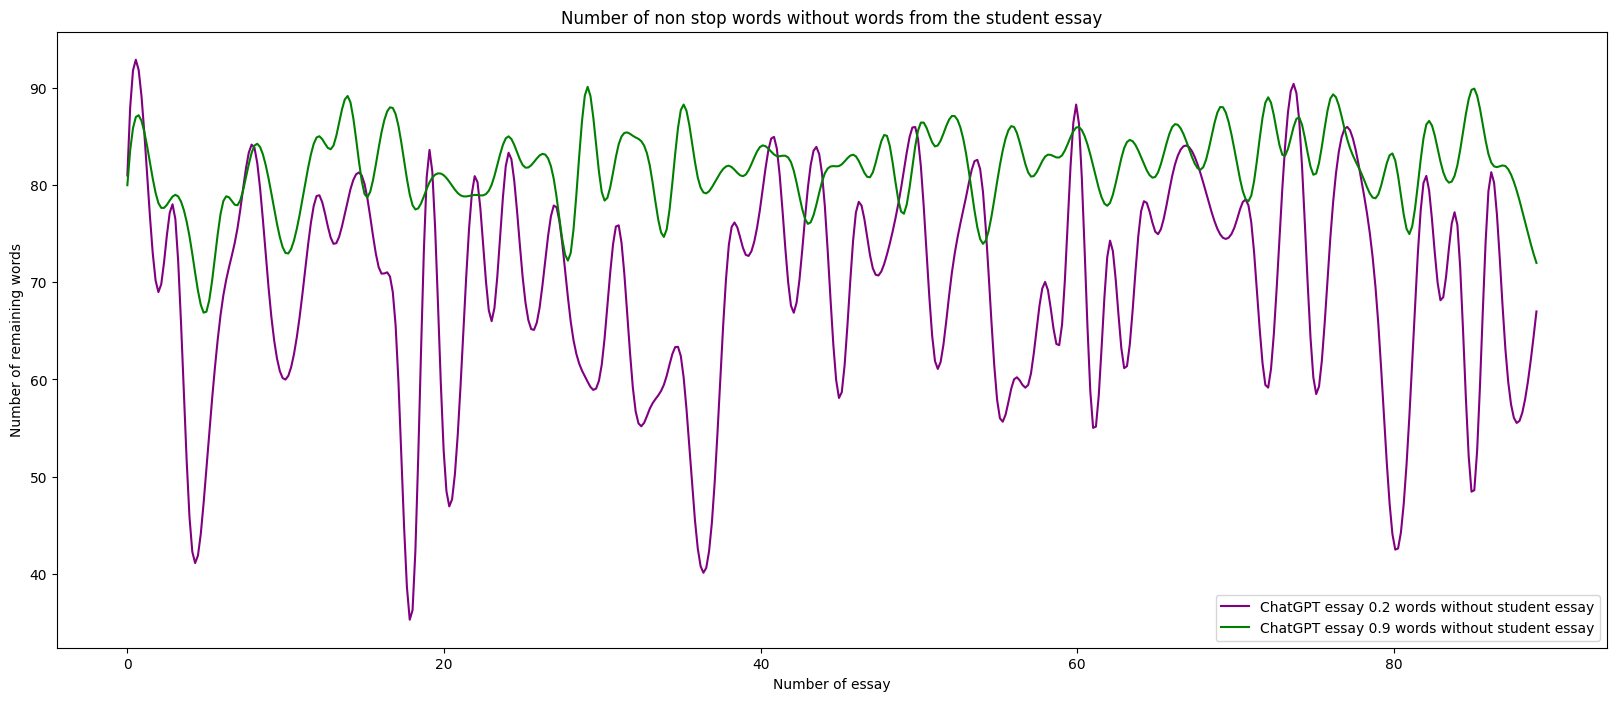

In [6]:
plot_smooth(essays["Unnamed: 0"], get_word_diff(words_ChatGPT_02, words_Students), "ChatGPT essay 0.2 words without student essay", "purple")
plot_smooth(essays["Unnamed: 0"], get_word_diff(words_ChatGPT_09, words_Students), "ChatGPT essay 0.9 words without student essay", "green")
plt.xlabel("Number of essay")
plt.ylabel("Number of remaining words")
plt.title("Number of non stop words without words from the student essay")
plt.legend()
plt.show()

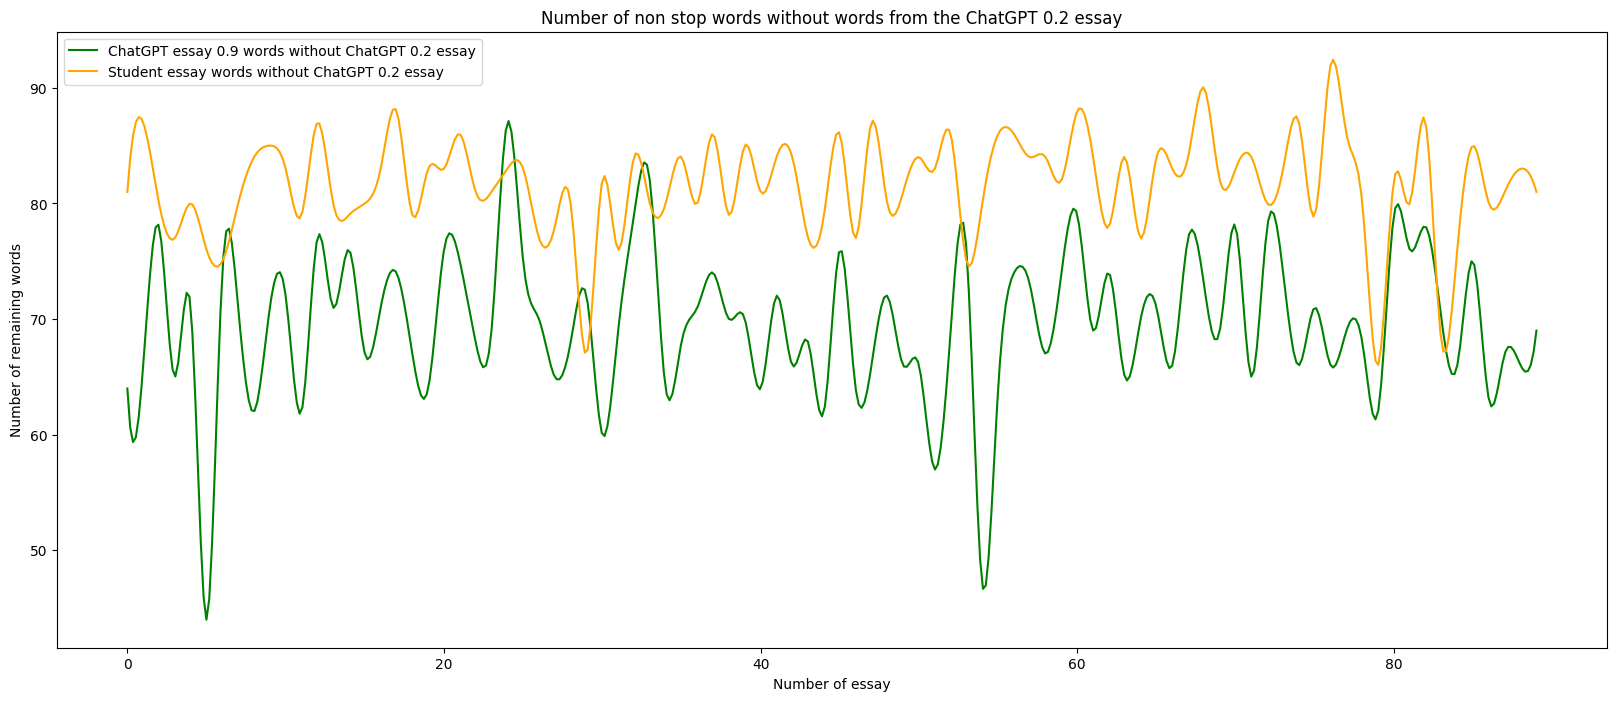

In [7]:
plot_smooth(essays["Unnamed: 0"], get_word_diff(words_ChatGPT_09, words_ChatGPT_02), "ChatGPT essay 0.9 words without ChatGPT 0.2 essay", "green")
plot_smooth(essays["Unnamed: 0"], get_word_diff(words_Students, words_ChatGPT_02), "Student essay words without ChatGPT 0.2 essay ", "orange")
plt.xlabel("Number of essay")
plt.ylabel("Number of remaining words")
plt.title("Number of non stop words without words from the ChatGPT 0.2 essay")
plt.legend()
plt.show()

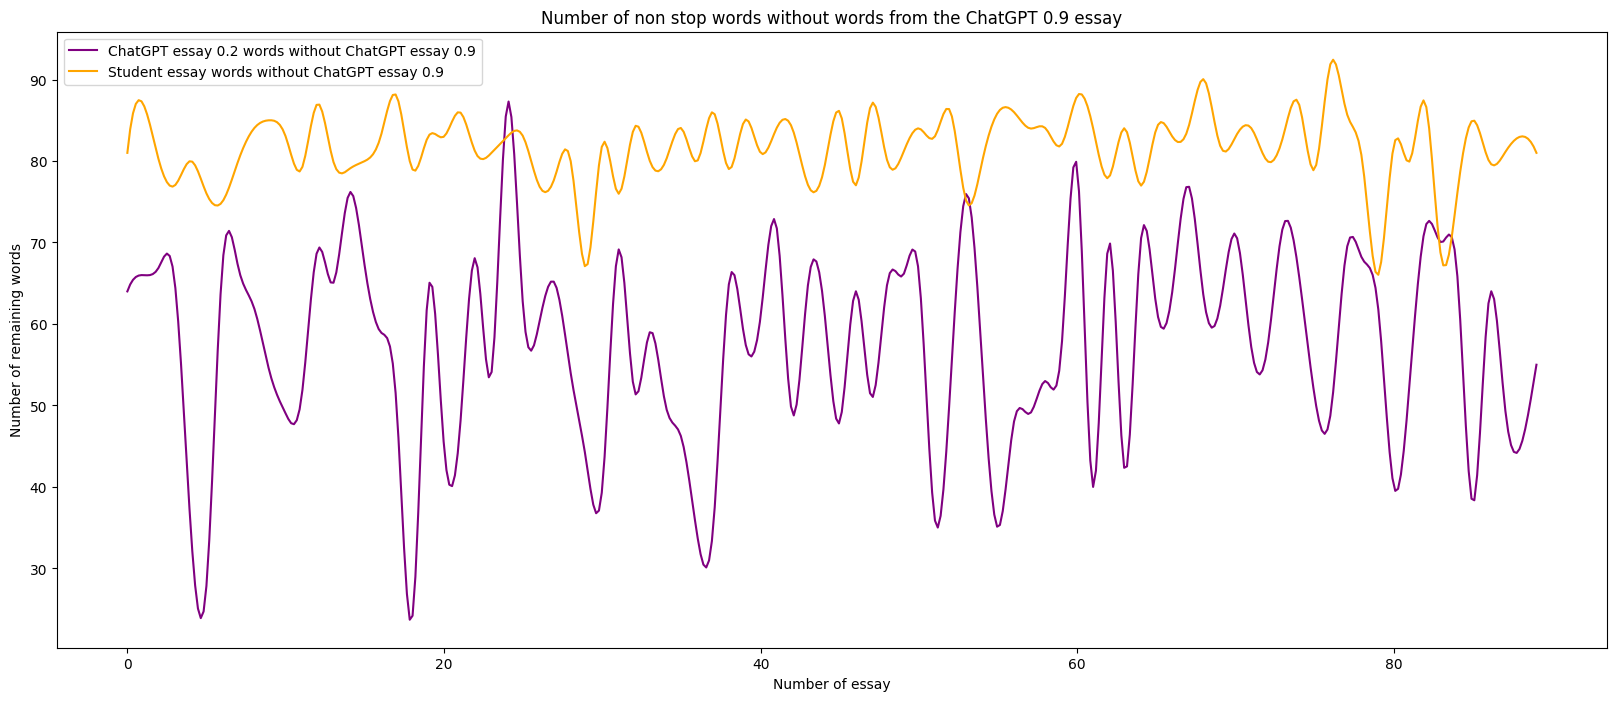

In [8]:
plot_smooth(essays["Unnamed: 0"], get_word_diff(words_ChatGPT_02, words_ChatGPT_09), "ChatGPT essay 0.2 words without ChatGPT essay 0.9", "purple")
plot_smooth(essays["Unnamed: 0"], get_word_diff(words_Students, words_ChatGPT_02), "Student essay words without ChatGPT essay 0.9", "orange")
plt.xlabel("Number of essay")
plt.ylabel("Number of remaining words")
plt.title("Number of non stop words without words from the ChatGPT 0.9 essay")
plt.legend()
plt.show()